<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/cuaderno%203/Detector_canciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile
from IPython.display import Audio
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from google.colab import files
from datetime import date, datetime
import soundfile as sf
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import yt_dlp as youtube_dl
import subprocess
import joblib
import shutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 8.3 MB/s eta 0:00:00
  Created 

INGRESO DE CANCIONES

In [ ]:
FILEID = "1B5jUniZaMtCIxxT5pCCA7PxKDM6H62cn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  canciones.xlsx && rm -rf /tmp/cookies.txt
!dir
lista_canciones = 'canciones.xlsx'
lista = pd.read_excel(lista_canciones) #lee el archivo de excel con pandas
lista

--2023-10-22 21:49:17--  https://docs.google.com/uc?export=download&confirm=&id=1B5jUniZaMtCIxxT5pCCA7PxKDM6H62cn
Resolving docs.google.com (docs.google.com)... 142.251.167.101, 142.251.167.138, 142.251.167.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.167.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nct9d4ii6qi6gn1vfpjbel9pvl00q810/1698011325000/08782253820849335664/*/1B5jUniZaMtCIxxT5pCCA7PxKDM6H62cn?e=download&uuid=b88aed8f-ce4f-4c0a-98a5-747e77067e6f [following]
--2023-10-22 21:49:17--  https://doc-0s-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nct9d4ii6qi6gn1vfpjbel9pvl00q810/1698011325000/08782253820849335664/*/1B5jUniZaMtCIxxT5pCCA7PxKDM6H62cn?e=download&uuid=b88aed8f-ce4f-4c0a-98a5-747e77067e6f
Resolving doc-0s-2c-docs.googleusercontent.com (doc-0s-2c-docs.googleusercontent.com)... 142.251.163.1

,Unnamed: 0,Canción,Artista,Género,Link,tipo
0,0,Honey are u coming,Maneskin,Rock,https://www.youtube.com/watch?v=ds18Ozzp8h0,1
1,1,You give love a bad name,Bon Jovi,Rock,https://www.youtube.com/watch?v=5iuoUarVnvo,1
2,2,I wanna be your slave,Maneskin,Rock,https://www.youtube.com/watch?v=yOb9Xaug35M,1
3,3,Don´t wanna sleep,Maneskin,Rock,https://www.youtube.com/watch?v=q7xpwbdHAKM&li...,1
4,4,I write sins not tragedies,Panic At The Disco,Rock,https://www.youtube.com/watch?v=vc6vs-l5dkc,1
5,5,Stuck,30 seconds to mars,Rock,https://www.youtube.com/watch?v=di-VTrW7Kr0,1
6,6,The kill,30 seconds to mars,Rock,https://www.youtube.com/watch?v=0cmuZ6kCWHw,1
7,7,Still Alive,Demi Lovato,Rock,https://www.youtube.com/watch?v=qO4mFC1OIBg,1
8,8,Heart Attack,Demi Lovato,Rock,https://www.youtube.com/watch?v=wP0CB_2QjGo,1
9,9,Middle of The Night,Loveless,Rock,https://www.youtube.com/watch?v=k3HsvPdB1Nc,1


In [ ]:
def descarga(video_url,name): #función para descargar mp3 de youtube
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])
    print("archivo descargado {}".format(filename))

In [ ]:
#crea la carpeta con las canciones en mp3
try:
  os.mkdir('Descargas') #crea un directorio con ese nombre
except:
  print("Carpeta Descargas ya existe")

N, P = lista.shape
Ns = N * 5 #dimensiones de la matriz. N canciones, P atributos
for n in range(N): #cada iteración es una canción
    print()
    print(f"Cancion {n+1} de {N}")
    print(f"Enlace: {lista.loc[n,'Link']}\n")
    print(f"Artista: {lista.loc[n,'Artista']}\n")
    print(f"Tipo: {lista.loc[n,'tipo']}\n")
    name_ = 'Descargas/'+lista.loc[n,'Artista']+"_"+str(n)+"_"+str(lista.loc[n,'tipo'])
    descarga(lista.loc[n,'Link'],name_)

    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

Carpeta Descargas ya existe

Cancion 1 de 20
Enlace: https://www.youtube.com/watch?v=ds18Ozzp8h0

Artista: Maneskin

Tipo: 1

[youtube] Extracting URL: https://www.youtube.com/watch?v=ds18Ozzp8h0
[youtube] ds18Ozzp8h0: Downloading webpage
[youtube] ds18Ozzp8h0: Downloading ios player API JSON
[youtube] ds18Ozzp8h0: Downloading android player API JSON
[youtube] ds18Ozzp8h0: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=ds18Ozzp8h0
[youtube] ds18Ozzp8h0: Downloading webpage
[youtube] ds18Ozzp8h0: Downloading ios player API JSON
[youtube] ds18Ozzp8h0: Downloading android player API JSON
[youtube] ds18Ozzp8h0: Downloading m3u8 information
[info] ds18Ozzp8h0: Downloading 1 format(s): 251
[download] Descargas/Maneskin_0_1.mp3 has already been downloaded
[download] 100% of    2.60MiB
archivo descargado Descargas/Maneskin_0_1.mp3

Cancion 2 de 20
Enlace: https://www.youtube.com/watch?v=5iuoUarVnvo

Artista: Bon Jovi

Tipo: 1

[youtube] Extracting URL: h

In [ ]:
archivos_wav = 'Descargas/'
wavs = [f for f in os.listdir(archivos_wav) if f.endswith('.wav')]
wavs #toma solamente los archivos .wav de la carpeta descargas

['Mago de Oz_12_2.wav',
 'Mago de Oz_17_2.wav',
 'Alexander Ribak _13_2.wav',
 'Mago de Oz_19_2.wav',
 'Bon Jovi_1_1.wav',
 'Mago de Oz_16_2.wav',
 'Mago de Oz_14_2.wav',
 'Mago de Oz_11_2.wav',
 'Demi Lovato_8_1.wav',
 '30 seconds to mars _6_1.wav',
 'Mago de Oz_10_2.wav',
 'Maneskin_2_1.wav',
 '30 seconds to mars _5_1.wav',
 'Mago de Oz_18_2.wav',
 'Maneskin_3_1.wav',
 'Panic At The Disco_4_1.wav',
 'Loveless_9_1.wav',
 'Mago de Oz_15_2.wav',
 'Maneskin_0_1.wav',
 'Demi Lovato_7_1.wav']

In [ ]:
fs = 48000
pl = np.array([20,40,60,80,100,120,140,160]) # fragmentos de tiempo puntos de lectura
tm = 5 #tiempo de la muestra
Ns = len(wavs)*len(pl) #cantidad de segmentos de audio a artir de la longitud de la lista de canciones
x_t = np.zeros((Ns,int(tm*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wavs:#lectura audio .wav
    x, fs = sf.read(archivos_wav+name)
    for ti in pl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+tm)),:]
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+tm}; tipo música {label[i]}")
        i+=1
x_t.shape

0 lectura: Mago de Oz_12_2.wav; segundo 20:25; tipo música [2.]
1 lectura: Mago de Oz_12_2.wav; segundo 40:45; tipo música [2.]
2 lectura: Mago de Oz_12_2.wav; segundo 60:65; tipo música [2.]
3 lectura: Mago de Oz_12_2.wav; segundo 80:85; tipo música [2.]
4 lectura: Mago de Oz_12_2.wav; segundo 100:105; tipo música [2.]
5 lectura: Mago de Oz_12_2.wav; segundo 120:125; tipo música [2.]
6 lectura: Mago de Oz_12_2.wav; segundo 140:145; tipo música [2.]
7 lectura: Mago de Oz_12_2.wav; segundo 160:165; tipo música [2.]
8 lectura: Mago de Oz_17_2.wav; segundo 20:25; tipo música [2.]
9 lectura: Mago de Oz_17_2.wav; segundo 40:45; tipo música [2.]
10 lectura: Mago de Oz_17_2.wav; segundo 60:65; tipo música [2.]
11 lectura: Mago de Oz_17_2.wav; segundo 80:85; tipo música [2.]
12 lectura: Mago de Oz_17_2.wav; segundo 100:105; tipo música [2.]
13 lectura: Mago de Oz_17_2.wav; segundo 120:125; tipo música [2.]
14 lectura: Mago de Oz_17_2.wav; segundo 140:145; tipo música [2.]
15 lectura: Mago de O

(160, 240000, 2)

In [ ]:
#para reproducir un segmento
muestra = int(input("Ingrese el numero de la muestra deseada [0,160]:"))
Audio(x_t[muestra].T,rate=fs)

Ingrese el numero de la muestra deseada [0,160]:150


CALCULAMOS LA TRANSFORMADA RÁPIDA DE FOURIER

In [ ]:
Vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #vector frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1)
#transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(160, 120001)

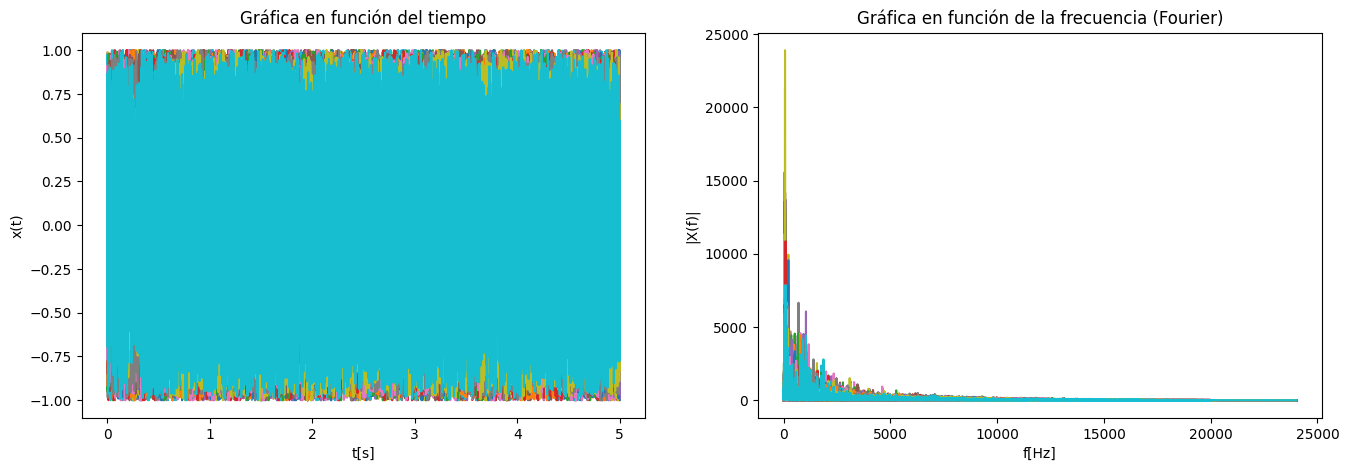

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.plot(np.arange(0,tm,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo y se transpone el resultado
plt.title('Gráfica en función del tiempo')
plt.xlabel('t[s]')
plt.ylabel('x(t)')

plt.subplot(122)
plt.plot(Vf,abs(Xw).T) #gráfica de la amplitud en función de la frecuencia
plt.title('Gráfica en función de la frecuencia (Fourier)')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')

plt.show()

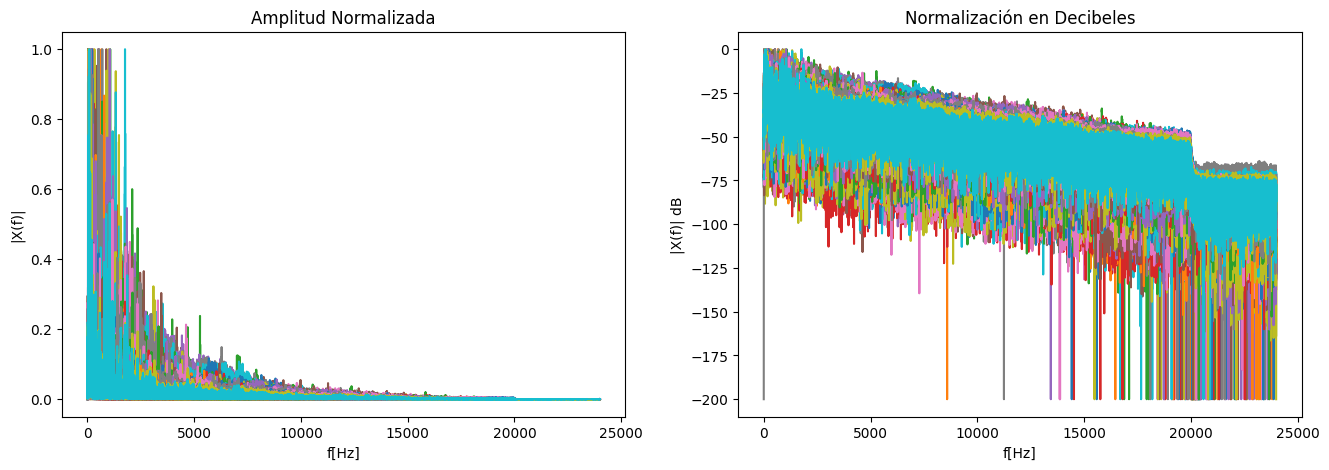

In [ ]:
sca = MinMaxScaler() #por default, se normaliza entre 0 y 1. puede cambiarse la amplitud normalizada a una que queramos con feature_range(min,max)
Xw2 = sca.fit_transform(abs(Xw).T).T

plt.figure(figsize=(16,5))

plt.subplot(121)
plt.plot(Vf,Xw2.T)
plt.title('Amplitud Normalizada')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')

#en dB
plt.subplot(122)
plt.plot(Vf,(20*np.log10(Xw2+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.title('Normalización en Decibeles')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')

plt.show()

ANÁLISIS 2D

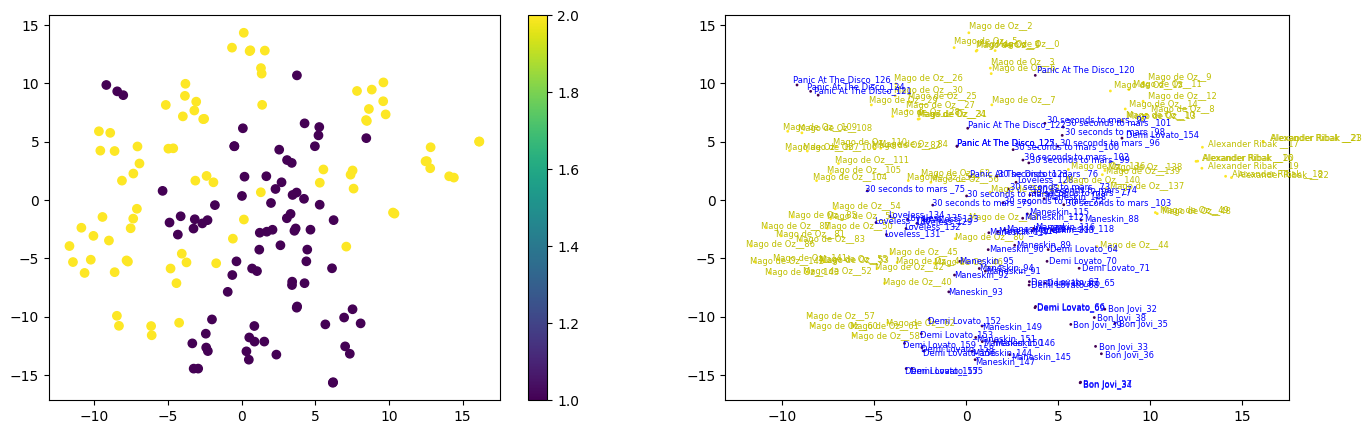

In [ ]:
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw2[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

#Gráfica 2D
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()

plt.subplot(122)
color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

plt.show()

In [ ]:
import joblib
os.mkdir('modelo')
ModeloCanciones = 'modelo/rock_vs_folkmetal'
model_ ={'Xw2':Xw2,'fmax': fmax, 'label' : label, 'name_c' : name_c, 'vf':Vf,'fs':fs}
joblib.dump(model_,ModeloCanciones+".pkl")

['modelo/rock_vs_folkmetal.pkl']

In [ ]:
# @title Descarga
namefile = str('Modelo'+'Canciones')
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# @title Llamar archivo
my_model_loaded = joblib.load(ModeloCanciones+".pkl")
my_model_loaded.keys()

dict_keys(['Xw2', 'fmax', 'label', 'name_c', 'vf', 'fs'])

ENTRADA CANCION NUEVA PARA COMPARAR

In [ ]:
CAC = input("Ingrese el link de la cancion a comparar: ")
descarga(CAC,'Cancion')

subprocess.call(['ffmpeg','-y', '-i', 'Cancion'+'.mp3',
                   'Cancion'+'.wav'])

Ingrese el link de la cancion a comparar: https://www.youtube.com/watch?v=-hMC8pQkEmk&ab_channel=CAguileraVEVO
[youtube] Extracting URL: https://www.youtube.com/watch?v=-hMC8pQkEmk&ab_channel=CAguileraVEVO
[youtube] -hMC8pQkEmk: Downloading webpage
[youtube] -hMC8pQkEmk: Downloading ios player API JSON
[youtube] -hMC8pQkEmk: Downloading android player API JSON
[youtube] -hMC8pQkEmk: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=-hMC8pQkEmk
[youtube] -hMC8pQkEmk: Downloading webpage
[youtube] -hMC8pQkEmk: Downloading ios player API JSON
[youtube] -hMC8pQkEmk: Downloading android player API JSON
[youtube] -hMC8pQkEmk: Downloading m3u8 information
[info] -hMC8pQkEmk: Downloading 1 format(s): 251
[download] Cancion.mp3 has already been downloaded
[download] 100% of    2.99MiB
archivo descargado Cancion.mp3


0

In [ ]:
plc = np.array([60])  # El punto de lectura de la canción ingresada será en 60 segundos
x_t_c = np.zeros((1, int(tm * fs), 2))

x, fs = sf.read('/content/Cancion.wav')
for i,ti in enumerate(plc):
  x_t_c[i] = x[int(fs*ti):int(fs*(ti+tm)),:] #aquí se crea la muestra de 5s de la cancion ingresada

In [ ]:
Xw_2 = np.fft.rfft(x_t_c,axis=1).mean(axis=-1) #Transformada de Fourier
Xw_3 = sca.fit_transform(abs(Xw_2).T).T #Normalizacion

In [ ]:
def euclidiana(Xw_3, Xw2):
    distances = np.zeros(Xw2.shape[0])  # Inicializar un arreglo para almacenar las distancias
    for i in range(Xw2.shape[0]):
        DE = np.sqrt(np.sum((Xw_3 - Xw2[i])**2))
        distances[i] = DE
    return distances

MinimaD = euclidiana(Xw_3, Xw2) #lista de las distancias de la entrada con toda la base de datos

Alfa = MinimaD[0]
for i in range(len(MinimaD)):   #Buscamos la distancia mas pequeña entre la señal ingresada y la base de datos
  if Alfa>MinimaD[i]:
    Alfa = MinimaD[i]
    a=i

print(MinimaD)
print(label[a])
print(MinimaD[a])

[ 9.32256578  8.9614093  14.11684965  8.28073094  9.01259246 12.07261433
  8.40429627  8.04285389  7.93438398  9.49881635  7.02530842  8.8855786
  8.20852752  7.06368677  7.29457906 10.61115646  6.32570284  6.80054631
  0.          5.99253364  6.22877333  7.74704984  5.83975738  8.4903879
  7.45570031  7.56017252  9.5384135   7.42201242  7.43055423  9.23670024
  8.10227314  7.3983242   8.38631136  8.99321191 13.28689883  9.16134637
 11.62275543 12.56177767  8.20962869 12.05422786 10.84697869  8.70071348
  9.15204628  8.55182895  8.87397814  8.6209532   8.50201213  7.17371401
 11.4358768  10.28526674  8.81121366  7.71119047  9.46159729  8.66527056
  7.8226449   8.60241194  7.41452957  8.90750114  8.62350631  8.9658559
  9.94145663  9.04448109  8.61280629  7.83283438  7.73403742  8.08001298
  8.98445487  8.30142072  8.4040672   9.22363125  7.56251548  7.88916777
  7.4926365   6.86415788  7.48860322  8.97162159  7.46872248  7.25323913
  7.13983901  7.57446711  7.89844814  8.05684862  8.77